<a href="https://colab.research.google.com/github/ibader85/UnstructuredDataAnalytics/blob/main/12_Advanced_Topics_Factor_Analysis_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

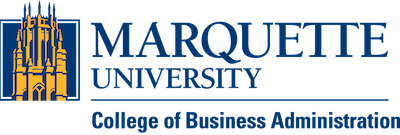




#BUAN4060: Unstructured Data Analytics

##12 Advanced Topics: Factor Analysis

##Instructor: Dr. Badar Al Lawati "Dr. B"

**Acknowledgment:** This material is based on the content created by `Prof. Timothy E. Carone`

**R on Colab:**

* You can change the runtime from Python to R, by clicking on the down arrow next to Connect, and picking "Change Runtime Type"

* You can change the project name by clicking on the title on top of this page

* You can export your notebook by going to File > Download .ipynb


### 1 What is Factor Analysis?

Exploratory Factor Analysis or simply Factor Analysis is a technique used for the identification of the latent relational structure. Using this technique, the variance of a large number can be explained with the help of fewer variables

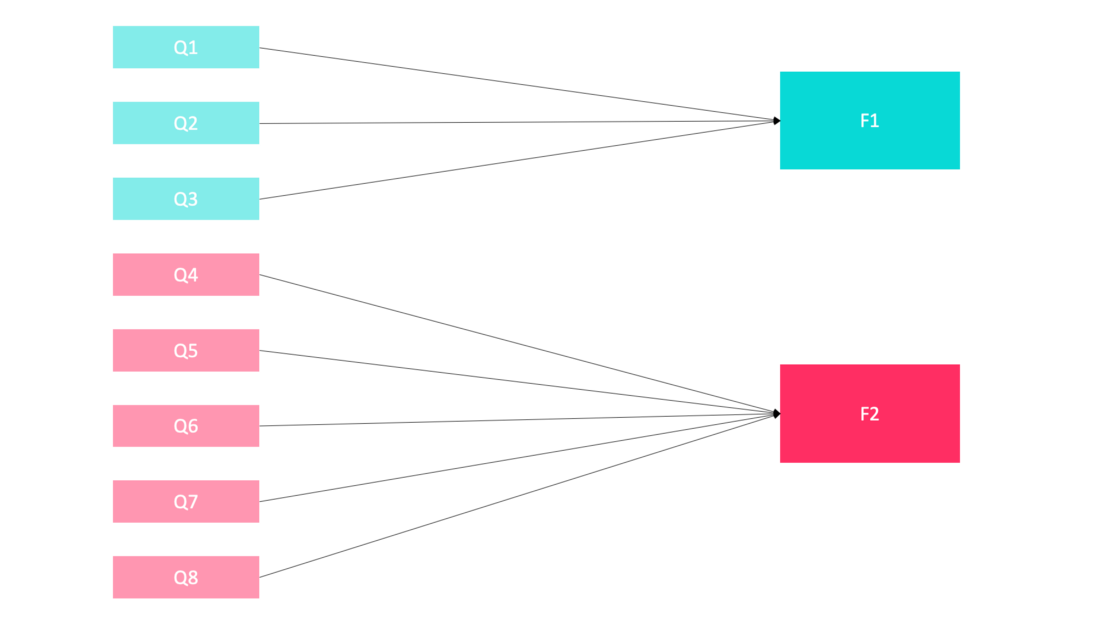

PCA’s approach to data reduction is to create one or more index variables from a larger set of measured variables. It does this using a linear combination (basically a weighted average) of a set of variables. The created index variables are called components. A Factor Analysis approaches data reduction in a fundamentally different way. It is a model of the measurement of a latent variable. This latent variable cannot be directly measured with a single variable (think: intelligence, social anxiety, soil health). Instead, it is seen through the relationships it causes in a set of Y variables.

For example, we may not be able to directly measure social anxiety. But we can measure whether social anxiety is high or low with a set of variables like “I am uncomfortable in large groups” and “I get nervous talking with strangers.” People with high social anxiety will give similar high responses to these variables because of their high social anxiety. Likewise, people with low social anxiety will give similar low responses to these variables because of their low social anxiety.

P-values. T-tests. Categorical variables. All are contenders for the most misused statistical technique or data science tool. Yet factor analysis is a whole different ball game. Though far from over-used, it is unquestionably the most controversial statistical technique, due to its role in debates about general intelligence. You didn’t think statistical techniques could be divisive, did you? [Not counting that one time that the U.C. Berkeley stats department left Andrew Gelman.]

In data science texts, factor analysis is that technique that is always mentioned along with PCA, and then subsequently ignored. It is like the Many Worlds interpretation of quantum mechanics, nay, it is the Star Wars Holiday Special of data science. Everyone is vaguely familiar with it, but no one seems to really understand it.

Factor analysis aims to give insight into the latent variables that are behind people’s behavior and the choices that they make. PCA, on the other hand, is all about the most compact representation of a dataset by picking dimensions that capture the most variance. This distinction can be subtle, but one notable difference is that PCA assumes no error of measurement or noise in the data: all of the ‘noise’ is folded into the variance capturing. Another important difference is that the number of researcher degrees of freedom, or choices one has to make, is much greater than that of PCA. Not only does one have to choose the number of factors to extract (there are ~10 theoretical criteria which rarely converge), but then decide on the method of extraction (there are ~7), as well as the type of rotation (there are also 7), as well as whether to use a variance or covariance matrix, and so on.

The goal of factor analysis is to figure out if many individual behaviors of users can’t be explained by a smaller number of latent characteristics. Making this more concrete, imagine you operate a restaurant. Although some of your customers eat pretty healthily, you notice that many often order a side of poutine with their otherwise dietetic kale salad. Being an inquisitive and data-oriented restaurateur, you come up with a hypothesis – Every order can be explained with one ‘healthfulness’ dimension, and people who order Poutine and kale salad at the same time are somewhere in the middle of a dimension characterized by ‘Exclusive Kale and Squash eaters’ on one end, and ‘Eats nothing but bacon’ on the other.

However, you note that this might not explain differences in how customers actually place their orders, so you come up with another – Perhaps there are two dimensions, one which is about how much people love or hate kale, and the other is about how much people love or hate Poutine. Maybe these dimensions, you reason, are orthogonal. Maybe they are somewhat negatively correlated. Maybe there is also a dimension concerned with how much your customers like the other competing dishes on the menu.

You start to notice a trend in your own hypotheses and realize that there could be any number of theorized dimensions. What you really want to know is the smallest number of dimensions that explain the most amount of variance in how your customers place their orders. Presumably, so you can keep more Poutine to yourself. (’Cause that stuff is delicious).

More technically, running a factor analysis is the mathematical equivalent of asking a statistically savvy oracle the following: “Suppose there are N latent variables that are influencing people’s choices –tell me how much each variable influence the responses for each item that I see, assuming that there is measurement error on everything”. Oftentimes, the ‘behavior’ or responses that are being analyzed comes in the form of how people answer questions on surveys.

Mathematically speaking, for person i, item j and behavior Yij, Factor analysis seeks to determine the following:

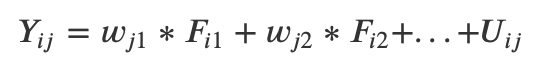

where 𝑤𝑖𝑗’s are the factor weights or loadings, 𝐹𝑖𝑗’s are the factors, and 𝑈𝑖𝑗 is the measurement error. 𝑈𝑖𝑗 is the variance that can’t be accounted for by the other terms in the equation. The insight of the people who created factor analysis was that this equation is actually a matrix reduction problem.

Just like any technique, it won’t run blind – you have to determine the number of factors to extract, similar to picking the number of dimensions to reduce to with PCA. There are numerous indicators about which number you should pick; I’ll go over the best ones later. I mention this because when you read guides and papers about factor analysis, the biggest concern is extracting the right number of factors properly. Make no mistake—this is something to worry about. However, the most important part of the factor or all data analysis for that matter, alas, is almost never mentioned. The number one thing to be mindful of when doing data or factor analysis is the tendency for your brain has to lie to you. Given the striking number of researcher degrees of freedom involved in factor analysis, it is very easy to justify making different choices because the results don’t conform to your intuitions.

Don’t believe me? Try this: Jack, George, and Anne are guests at a dinner party. Jack is looking at Anne, and Anne is looking at George. Jack is married, George is not. Is a married person looking at an unmarried person?

1. Yes
2. No
3. Not enough information

Most people upon reading this question realize there is a trick involved, and grab a piece of paper to work out the answer. They then pick C. It seems logical. Yet the correct answer is A – it doesn’t matter if Anne is married or not. Reno really is west of Los Angeles. The struggle continues.

Unless you take an intentional stance against it, your brain will try and rationalize its preconceived notions on to your analysis. This usually takes the form of rounding factor loadings up or down or justifying how many factors to extract. Remember: You want to believe what the data says you should believe.

## 2 Getting Started with Factor Analysis in R
### 2.1 Preprocessing

We will use a set of data already present in the psych package. I’ll be using the ‘bfi’ dataset that comes with the psych package. The data is in the form of responses to personality questions known as the Big Five Inventory

However, any sort of record of behavior will do – at the end of the day, you’ll need to be able to make a full correlation matrix. The larger your sample size, the better

A sample size of 400-500 is generally agreed to be a good rule of thumb

Now the fun begins. The psych package as a handy describe function
    
    (Note: Each alphanumeric pair represents a personality ‘trait’, taken with a 6-point Likert scale)

In [3]:
install.packages("psych")
require(psych)
describe(bfi)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’


Loading required package: psych



,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1,1,2784,2.413434,1.4077372,2,2.230251,1.4826,1,6,5,0.82504356,-0.30763947,0.026680069
A2,2,2773,4.802380,1.1720199,5,4.977017,1.4826,1,6,5,-1.12428533,1.05483862,0.022256663
A3,3,2774,4.603821,1.3018336,5,4.788288,1.4826,1,6,5,-0.99845684,0.44204096,0.024717370
A4,4,2781,4.699748,1.4796327,5,4.932584,1.4826,1,6,5,-1.03094275,0.04045252,0.028057788
A5,5,2784,4.560345,1.2585121,5,4.711849,1.4826,1,6,5,-0.84723335,0.15890562,0.023851889
C1,6,2779,4.502339,1.2413465,5,4.640899,1.4826,1,6,5,-0.85470158,0.30442934,0.023547715
C2,7,2776,4.369957,1.3183465,5,4.502250,1.4826,1,6,5,-0.74181968,-0.13643987,0.025021875
C3,8,2780,4.303957,1.2885518,5,4.417716,1.4826,1,6,5,-0.69145540,-0.13233095,0.024438778
C4,9,2774,2.553353,1.3751181,2,2.413514,1.4826,1,6,5,0.59617294,-0.62141881,0.026108792


There is some demographic data included in this dataset, which I will trim for the factor analysis

In [4]:
df <- bfi[1:25]

While factor analysis works for both covariance as well as correlation matrices, the recommended practice is to use a correlation matrix

That’s right—All you really need is a correlation matrix of different indicators of behavior (even if that behavior is ‘clicking on a button’, ‘answering a question a certain way’, or ‘actually giving us money’)

## 3 Determining the Number of Factors

Though there are myriad indicators for the ‘proper’ number of factors to extract, there are two main techniques, other than the time-honored tradition of inspecting various factor solutions and interpreting the results

The first is to inspect a scree plot, or an’eigenvalue vs. number of factors / components’ chart.



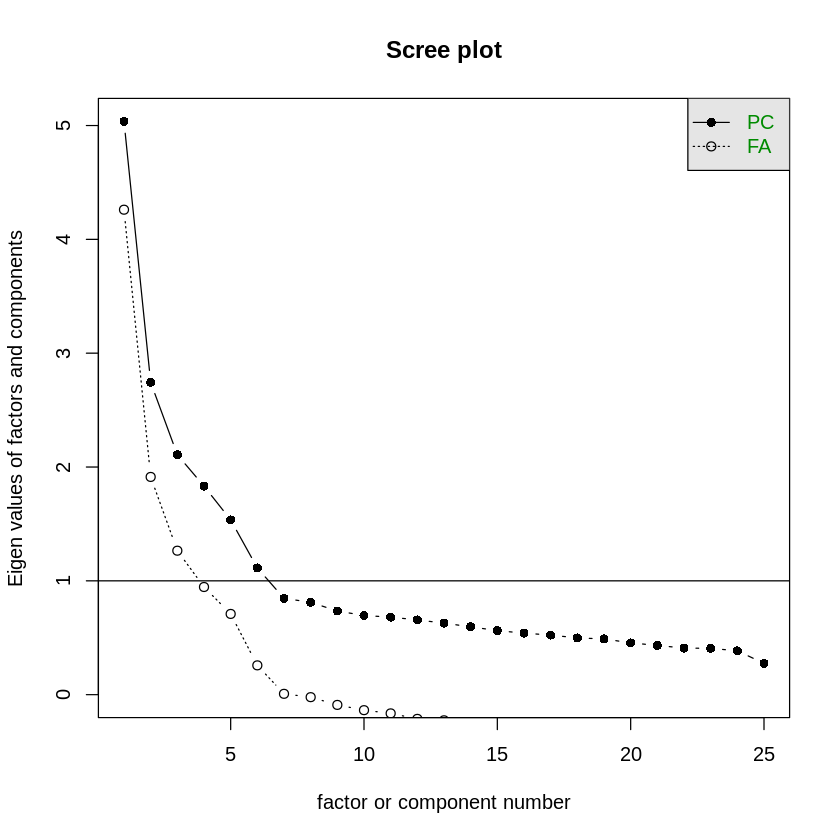

In [5]:
scree(df)

After a certain point, each additional factor or component will result in a mere marginal reduction of eigenvalue. (Translation: Each additional factor doesn’t explain too much more variance.) There will generally be some sort of ‘Elbow’, and the idea is you pick the last factor that still reduces the variance. Is this subjective? Yes. Can intuition be built around this rule? Yes.

A word of caution: There is a tendency to just take the number of factors whose eigenvalues are greater than one. This is a near-universal mistake. Don’t do it. You’ve been warned. Also, it helps to make sure that you are viewing the scree plot full-sized, and not just in the small RStudio plot window.

In this case, if we strictly follow the ‘find the elbow’ rule, it looks like ‘6’ is the highest number one could get away with. There are more sophisticated methods for double-checking the number of factors to extract, like parallel analysis. A description of parallel analysis, courtesy of The Journal of Vegetation Science: “In this procedure, eigenvalues from a data set prior to rotation are compared with those from a matrix of random values of the same dimensionality (p variables and n samples).” The idea is that any eigenvalues below those generated by random chance are superfluous.

Parallel analysis suggests that the number of factors = 6 and the number of components = 6

Here is the plot output:

Parallel analysis suggests that the number of factors =  7  and the number of components =  7 


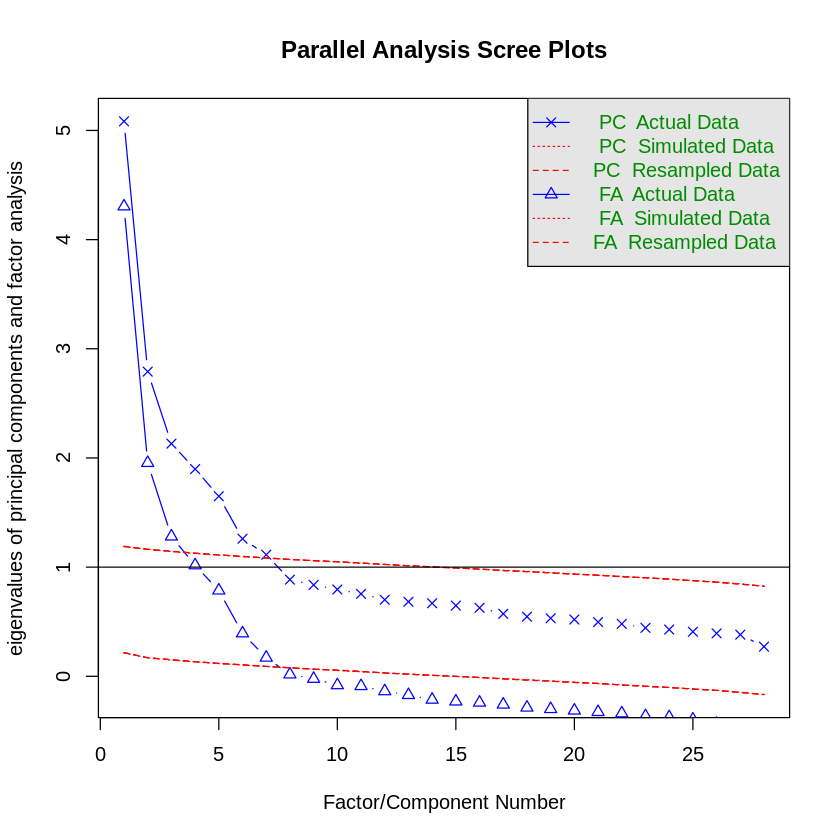

In [6]:
fa.parallel(bfi)

In [ ]:
## Parallel analysis suggests that the number of factors =  7  and the number of components =  7

By know you are thinking “okay, we’ve decided on the number of factors to extract

Can we just get it over with already? My buddy is doing PCA and she’s already left to go eat her Kale and Poutine lunch.” Not so fast

We have to figure out how to extract the 6 factors and then if and how we want to rotate them to aid our interpretation.

## 4 Factor Extraction

There are a plethora of factor extraction techniques, the merits of most of which are compared in this (useful) thrill-a-minute thesis (http://scholarcommons.usf.edu/cgi/viewcontent.cgi?article=5656&context=etd).

Here is what you need to know. There are three main factor extraction techniques: Ordinary least Squares (also called ‘Minimum Residuals’, or ‘Minres’, for short), Maximum Likelihood, and Principal Axis factoring. OLS / Minres has been found to outperform other methods in a variety of situations, and usually gives a solution close to what you would get if you used Maximum Likelihood

Maximum Likelihood is useful because you can calculate confidence intervals. Principal axis factoring is a widely used method that places most of the variance on the first factor

As with all data analysis, if you have robust, meaningful results or signal in your data from a new method or experiment, then what you’ll be concerned with should be invariant to the factor extraction technique

But if your work is sensitive to smaller differences in factor loading scores and interpretation, than it is worth taking the time to figure out which tool is best for you. For an exploratory analysis of the bfi data, the ols / minres method suffices.



## 5 Rotation

Factor extraction is one thing, but they are usually difficult to interpret, which arguably defeats the whole point of this exercise. To adjust for this, it is common to ‘rotate’, or choose slightly different axes in the n-factor subspace so that your results are more interpretable. Essentially, rotation sacrifices some of the explained variances for actually knowing what is going on. (This is a little hand-wavy, but rotation is strongly recommended by most, if not all of notable 20th-century psychometricians.).

Quite unlike Kale, rotation comes in two distinct flavors. An orthogonal rotation assumes that the factors uncorrelated, while an oblique rotation assumes they are correlated

The choice between orthogonal vs. oblique choice depends on your particular use-case. If your data consists of items from one large domain and you have no reason to think that certain behaviors could be completely uncorrelated, use oblique rotation

If you want to know more, see here (http://www.utdallas.edu/~herve/Abdi-rotations-pretty.pdf) for a brief overview, and here (http://jalt.org/test/PDF/Brown31.pdf) for a little more depth.

Two popular types of rotation are Varimax (orthogonal), and Oblimin (oblique). Given that the data I am analyzing is based on personality items, I’ll choose oblimin rotation, as there is good apriori reason to assume that the factors of personality are not orthogonal.

Factor analysis has a really simple command in R:

In [7]:
fa(df,6,fm='minres',rotate='oblimin')

Loading required namespace: GPArotation



Factor Analysis using method =  minres
Call: fa(r = df, nfactors = 6, rotate = "oblimin", fm = "minres")
Standardized loadings (pattern matrix) based upon correlation matrix
     MR2   MR1   MR3   MR5   MR4   MR6   h2   u2 com
A1  0.09 -0.09  0.08 -0.56  0.06  0.30 0.34 0.66 1.7
A2  0.04 -0.04  0.08  0.68  0.00 -0.05 0.50 0.50 1.1
A3 -0.02 -0.12  0.03  0.61  0.07  0.11 0.51 0.49 1.2
A4 -0.07 -0.06  0.19  0.39 -0.10  0.15 0.28 0.72 2.1
A5 -0.16 -0.19  0.01  0.45  0.13  0.21 0.47 0.53 2.3
C1  0.01  0.06  0.54 -0.06  0.19  0.07 0.34 0.66 1.3
C2  0.07  0.14  0.67  0.02  0.11  0.17 0.49 0.51 1.3
C3  0.01  0.06  0.55  0.08 -0.04  0.06 0.31 0.69 1.1
C4  0.06  0.09 -0.64 -0.06  0.07  0.30 0.57 0.43 1.5
C5  0.15  0.18 -0.54 -0.01  0.11  0.05 0.43 0.57 1.5
E1 -0.13  0.59  0.11 -0.12 -0.08  0.09 0.39 0.61 1.3
E2  0.05  0.70 -0.02 -0.07 -0.06  0.03 0.56 0.44 1.0
E3  0.00 -0.34  0.00  0.15  0.40  0.21 0.48 0.52 2.9
E4 -0.05 -0.53  0.03  0.20  0.04  0.29 0.55 0.45 1.9
E5  0.15 -0.40  0.27  0.05  0.2

There is a lot in this output, I won’t unpack it all – You can find more detail in the documentation of the psych package. Included in the printout are metrics about how well the model fit the data. The standard rule of thumb is that the RMSEA index should be less than .06

I’ve highlighted it to make things easier. The other metrics can be valuable, but each has a specific case or three for which it doesn’t work, rmsea works across the board. Double check to make sure this value isn’t too high. Then, the fun part – do a rough inspection of the factors by calling

In [8]:
print(fa(df,6,fm='minres',rotate='oblimin')$loadings,cut=.2)


Loadings:
   MR2    MR1    MR3    MR5    MR4    MR6   
A1                      -0.559         0.297
A2                       0.682              
A3                       0.613              
A4                       0.391              
A5                       0.451         0.212
C1                0.541                     
C2                0.673                     
C3                0.554                     
C4               -0.643                0.303
C5               -0.543                     
E1         0.594                            
E2         0.695                            
E3        -0.342                0.397  0.210
E4        -0.535         0.204         0.287
E5        -0.399  0.268         0.234       
N1  0.837                                   
N2  0.833                                   
N3  0.673                                   
N4  0.429  0.417                            
N5  0.438  0.234                            
O1                              0.573       

Always be sure to look at the last factor—in this case, none of the loadings on the last factor are the highest, which suggests that it is unnecessary. Thus we move to a 5-factor solution:

In [9]:
fa(df,5,fm='minres','oblimin')

Factor Analysis using method =  minres
Call: fa(r = df, nfactors = 5, n.obs = "oblimin", fm = "minres")
Standardized loadings (pattern matrix) based upon correlation matrix
     MR2   MR1   MR3   MR5   MR4   h2   u2 com
A1  0.21  0.17  0.07 -0.41 -0.06 0.19 0.81 2.0
A2 -0.02  0.00  0.08  0.64  0.03 0.45 0.55 1.0
A3 -0.03  0.12  0.02  0.66  0.03 0.52 0.48 1.1
A4 -0.06  0.06  0.19  0.43 -0.15 0.28 0.72 1.7
A5 -0.11  0.23  0.01  0.53  0.04 0.46 0.54 1.5
C1  0.07 -0.03  0.55 -0.02  0.15 0.33 0.67 1.2
C2  0.15 -0.09  0.67  0.08  0.04 0.45 0.55 1.2
C3  0.03 -0.06  0.57  0.09 -0.07 0.32 0.68 1.1
C4  0.17  0.00 -0.61  0.04 -0.05 0.45 0.55 1.2
C5  0.19 -0.14 -0.55  0.02  0.09 0.43 0.57 1.4
E1 -0.06 -0.56  0.11 -0.08 -0.10 0.35 0.65 1.2
E2  0.10 -0.68 -0.02 -0.05 -0.06 0.54 0.46 1.1
E3  0.08  0.42  0.00  0.25  0.28 0.44 0.56 2.6
E4  0.01  0.59  0.02  0.29 -0.08 0.53 0.47 1.5
E5  0.15  0.42  0.27  0.05  0.21 0.40 0.60 2.6
N1  0.81  0.10  0.00 -0.11 -0.05 0.65 0.35 1.1
N2  0.78  0.04  0.01 -0.09  

These metrics tell us that solution is certainly not terrible, and thus on to the factor inspection:

In [10]:
print(fa(df,5,fm='minres',rotate='oblimin')$loadings,cut=.2)


Loadings:
   MR2    MR1    MR3    MR5    MR4   
A1  0.213               -0.414       
A2                       0.640       
A3                       0.660       
A4                       0.433       
A5         0.233         0.532       
C1                0.546              
C2                0.666              
C3                0.567              
C4               -0.614              
C5               -0.553              
E1        -0.557                     
E2        -0.676                     
E3         0.418         0.246  0.283
E4         0.591         0.287       
E5         0.421  0.271         0.206
N1  0.815                            
N2  0.777                            
N3  0.706                            
N4  0.474 -0.386                     
N5  0.486 -0.202         0.207       
O1                              0.508
O2                             -0.456
O3                              0.609
O4        -0.323                0.371
O5                             -0.542



Right off the bat, this loading table looks a lot cleaner – items clearly load on one predominant factor, and the items seem to be magically grouped by letter

Spoiler: it was this very kind of analysis that originally lead psychometricians and personality researchers to conclude that there are five major dimensions to interpersonal differences: Agreeableness, **Conscientiousness**, Extraversion, Neuroticism (sometimes called emotional stability), and Openness

Each one of those terms has a precise technical definition that usually differs from how you might use the words in conversations. But that is a whole different story.

Now comes the most rewarding part of factor analysis*– figuring out a concise name for the factor, or construct, that can explain how and why people made the choices they did. This is much harder to do, by the way, if you have underspecified the number of factors that best fit this data

*Funny, only psychometricians seem to think that factor analysis is ‘rewarding’.

This has really only been the tip of the iceberg — there is much more complexity involved in special kinds of rotation and factor extraction, bifactor solutions… Don’t even get me started on factor scores. Factor analysis can be a powerful technique and is a great way of interpreting user behavior or opinions

The most important take away from this approach is that factor analysis lays bare the number of choices research must make when utilizing statistical tools, and the number of choices is directly proportional to the number of opportunities for your brain to project itself onto your data. Other techniques that seem simpler have merely made these choices behind the scenes. None, however, have the storied history of factor analysis